# 데이터 가공 및 시각화
- 1. 전처리
    - 결측값 처리: 단순대치, 평균 대치, 단순확률 대치 (Hot-deck, nearest neighbor), 다중 대치, knnImputation, centralimputation
    - **클래스불균형: 업샘플링 (SMOTE, Boaderline SMOTE, Adasyn), 다운샘플링**
    - 이상값 처리: 극단값 절단, 조정
    - 변수 변환, 스케일링: 수치형 변수 변환(로그변환, 제곱근변환, 지수변환, 제곱변환, Box-cox 변환, 표준화, 정규화), 범주형 변수 변환(범주형 변수 인코딩, 대규모 범주형 변수처리), 날짜 및 변수 변환,  피쳐스케일링
    - 원핫인코딩(더미변수), 컬럼 트랜스퍼, 구간분할, 이산화, 피쳐선택
- 2. 표본 추출: 단순랜덤 추출법, 계통추출법, 집락추출법, 층화추출법
- 3. 데이터 분할: 구축/검정/시험용, 홀드아웃방법, 교차확인방법 (10 fold 교차분석), 부트스트랩
- 4. 그래프 그리기:
    - 산점도, 막대그래프, 선그래프, 히트맵, 서브플롯, 트리맵, 도넛차트, 버블차트, 히스토그램, 체르노프 페이스, 스타차트, 다차원척도법, 평행좌표계
    - 도식화와 시각화


In [44]:
# %pip install imblearn
# 필요 모듈 임포트
import imblearn
print(imblearn.__version__)

0.9.0


In [31]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 필요 함수 정의
def count_and_plot(y):
    counter = Counter(y)
    for k, v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    plt.bar(counter.keys(), counter.values())
    plt.show()
    
# 데이터 읽어오기
X, y = make_classification(n_classes=2, class_sep=2,
                          weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                          n_features=5, n_clusters_per_class=1, n_samples=1000, random_state=42)

Class=1, n=900 (90.000%)
Class=0, n=100 (10.000%)


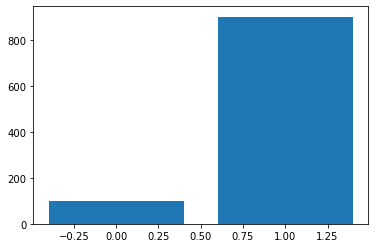

In [32]:
count_and_plot(y)
# 4번 클래스 데이터는 존재하지 않음

## Under sampling과 단순 Over Sampling은 권장하지 않는 방법
### Under sampling 언더 샘플링
언더샘플링의 단점은 잠재적으로 정보의 가치가 높은 데이터도 버려서 유용한 데이터가 사라지는 위험

Class=0, n=100 (50.000%)
Class=1, n=100 (50.000%)


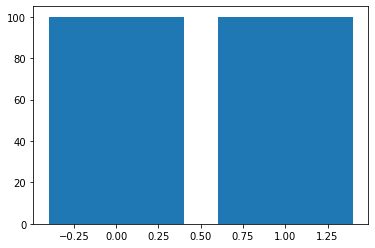

In [39]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=42).fit_resample(X, y)
count_and_plot(y_resampled)

### Over sampling 오버 샘플링
오버샘플링은 상대적으로 적은 클래스의 데이터를 뻥튀기시켜 늘리는 방식

가장 단순한 방식은 동일한 데이터를 똑같이 복사해서 수만 늘리는 것

이럴 경우 오버피팅의 위험이 생김

Class=1, n=900 (50.000%)
Class=0, n=900 (50.000%)


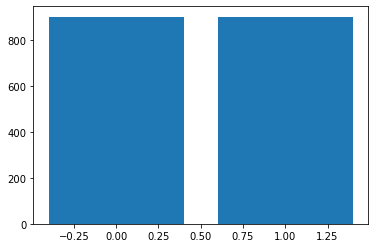

In [38]:
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler(random_state=42).fit_resample(X, y)
count_and_plot(y_resampled)

### Algorithm Over Sampling 알고리즘을 통한 오버샘플링
#### 오버 샘플링 알고리즘 중 가장 많이 쓰이는 것은 SMOTE와 ADASYN이다
#### SMOTE는
    - 1. 먼저 소수 클래스에서 각각의 샘플들의 knn(k-nearest neighors)을 찾는다.
    - 2. 그리고 그 이웃들 사이에 선을 그어 무작위 점을 생성한다.
이렇게 생성하면 완전히 동일하진 않지만 샘플들 사이의 특성들을 반영한 데이터가 생성되기 때문에 오버 피팅에 나름대로 강한 데이터가 생성됨 (없지는 않음)

Class=1, n=900 (50.000%)
Class=0, n=900 (50.000%)


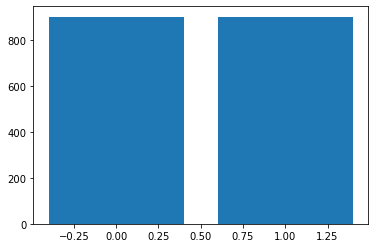

In [37]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)
count_and_plot(y_resampled)

#### ADASYN은
SMOTE의 개선된 버전

동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성됨.

즉, 모든 표본이 약간 더 분산됨

상황에 따라 가장 많은 클래스 데이터 수로 지정할 수도 있지만 더 많은 숫자로 지정해서 모든 클래스를 오버 샘플링할 수도 있음

Class=1, n=900 (50.000%)
Class=0, n=900 (50.000%)


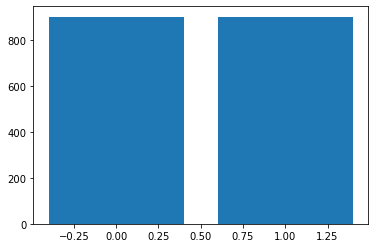

In [40]:
from imblearn.over_sampling import ADASYN
strategy = {0:900, 1:900}
X_resampled, y_resampled = ADASYN(random_state=0, sampling_strategy=strategy).fit_resample(X, y)
count_and_plot(y_resampled)

### Cost-sensitive learning
Cost sensitive learning은 데이터 자체를 생성하진 않는다.

다만 머신러닝을 학습할 때 소수의 클래스에 대한 **cost값에 가중치를 더 많이 주어 균형 잡힌 학습이 가능하게 하는 방법.**

상황에 따라 Cost-sensitive learning과 알고리즘을 이용한 오버 샘플링 결정

In [43]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(X_, y_, model_):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model_, X_, y_, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

model = RandomForestClassifier(n_estimators=1000)
scores = evaluate_model(X, y, model)
print('Mean Accuracy No weight: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

weights = {0:10.0, 1:1.0}
model = RandomForestClassifier(n_estimators=1000, class_weight=weights)
scores = evaluate_model(X, y, model)
print('Mean Accuracy    weight: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy No weight: 0.998 (0.003)
Mean Accuracy    weight: 0.999 (0.002)
